In [2]:
import pandas as pd 
df = pd.read_csv("creditcard.csv")

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN 
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

#from sklearn import cross_validation, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For NB implementation 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

#For Logistic Regression implementation 
from sklearn.linear_model import LogisticRegression

#For Random Forest implementation 
from sklearn.ensemble import RandomForestClassifier

#For SVM implementation 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#For MLP implementation 
from sklearn.neural_network import MLPClassifier

#For XGBoost 
from xgboost import XGBClassifier

#For LightGBM 
import lightgbm as lgbm

#For Stacking 
from sklearn.ensemble import StackingClassifier

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=424)

/common/home/projectgrps/IS450/IS450G10/jupyterlab-venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


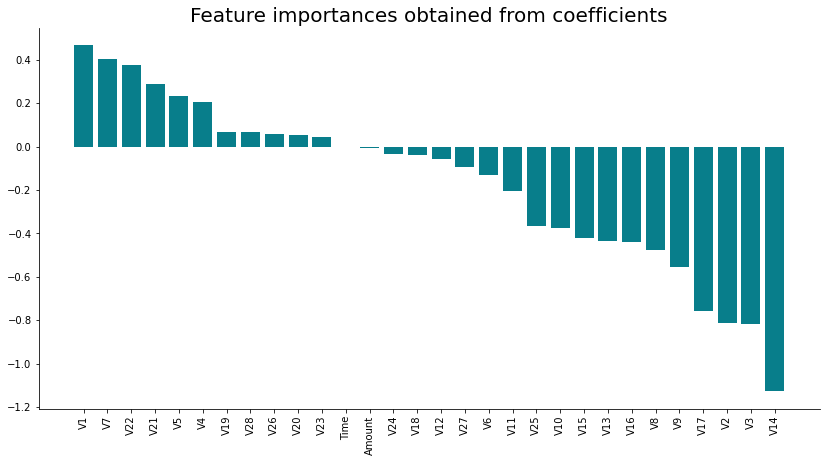

In [5]:
#Feature importance ranking using Logistic Regression 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr.coef_[0]
})
lr_importances = lr_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=lr_importances['Attribute'], height=lr_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
#df = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(100))
stratified_kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=424)

## Logistic Regression Top 2 Important Features

In [6]:
# Logistic Regression Feature Selection (Top 2) 
X, y = df[['V1', 'V7']], df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=424)

In [9]:
log_reg = LogisticRegression(random_state=424)

c_values = [0.1, 10, 100]
parameters = dict(C=c_values)
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression: {cv_score}\nTest score of Logistic Regression: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression: 0.317911195864112
Test score of Logistic Regression: 0.21134404066487072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.41      0.11      0.17        82

    accuracy                           1.00     56962
   macro avg       0.70      0.55      0.59     56962
weighted avg       1.00      1.00      1.00     56962



In [10]:
log_reg_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', LogisticRegression(random_state=424)]])



param_grid = {'classifier__C':[0.1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg_smote_pipeline,
                           param_grid=param_grid,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression (SMOTE): {cv_score}\nTest score of Logistic Regression (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression (SMOTE): 0.11172581801799208
Test score of Logistic Regression (SMOTE): 0.09972922777495506
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56880
           1       0.02      0.73      0.03        82

    accuracy                           0.93     56962
   macro avg       0.51      0.83      0.50     56962
weighted avg       1.00      0.93      0.96     56962



In [11]:
log_reg_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', LogisticRegression(random_state=424)]])

param_grid = {'classifier__C':[0.1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg_adasyn_pipeline,
                           param_grid=param_grid,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression (ADASYN): {cv_score}\nTest score of Logistic Regression (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression (ADASYN): 0.09316484930818476
Test score of Logistic Regression (ADASYN): 0.08326452403345153
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56880
           1       0.01      0.74      0.02        82

    accuracy                           0.90     56962
   macro avg       0.51      0.82      0.49     56962
weighted avg       1.00      0.90      0.95     56962



In [12]:
log_reg_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', LogisticRegression(random_state=424)]])

param_grid = {'classifier__C':[0.1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg_nearmiss_pipeline,
                           param_grid=param_grid,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression (NearMiss): {cv_score}\nTest score of Logistic Regression (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression (NearMiss): 0.030572709548996886
Test score of Logistic Regression (NearMiss): 0.026639133000434516
              precision    recall  f1-score   support

           0       1.00      0.50      0.66     56880
           1       0.00      0.85      0.00        82

    accuracy                           0.50     56962
   macro avg       0.50      0.68      0.33     56962
weighted avg       1.00      0.50      0.66     56962



In [13]:
#Naive Bayes Feature Selection (Top 2) 
nb = GaussianNB()
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator=nb,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes: {cv_score}\nTest score of Naive Bayes: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes: 0.16486919473366984
Test score of Naive Bayes: 0.11919892522431044
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.06      0.23      0.10        82

    accuracy                           0.99     56962
   macro avg       0.53      0.61      0.55     56962
weighted avg       1.00      0.99      1.00     56962



In [14]:
nb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                   ['classifier', GaussianNB()]])

parameters = {'classifier__var_smoothing': [0.1, 10, 100]}
grid_search = GridSearchCV(estimator=nb_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes (SMOTE): {cv_score}\nTest score of Naive Bayes (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes (SMOTE): 0.19017300600401027
Test score of Naive Bayes (SMOTE): 0.14353199409293205
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.10      0.21      0.14        82

    accuracy                           1.00     56962
   macro avg       0.55      0.60      0.57     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
nb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                   ['classifier', GaussianNB()]])

parameters = {'classifier__var_smoothing': [0.1, 10, 100]}
grid_search = GridSearchCV(estimator=nb_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes (ADASYN): {cv_score}\nTest score of Naive Bayes (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes (ADASYN): 0.15859887807553408
Test score of Naive Bayes (ADASYN): 0.13789154315576801
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56880
           1       0.05      0.38      0.09        82

    accuracy                           0.99     56962
   macro avg       0.53      0.68      0.54     56962
weighted avg       1.00      0.99      0.99     56962



In [16]:
nb_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                   ['classifier', GaussianNB()]])

parameters = {'classifier__var_smoothing': [0.1, 10, 100]}
grid_search = GridSearchCV(estimator=nb_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes (NearMiss): {cv_score}\nTest score of Naive Bayes (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes (NearMiss): 0.17567710677146636
Test score of Naive Bayes (NearMiss): 0.12603090471316142
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.08      0.21      0.11        82

    accuracy                           1.00     56962
   macro avg       0.54      0.60      0.56     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
dt= DecisionTreeClassifier(random_state=424)

parameters = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 20, 50],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree: {cv_score}\nTest score of Decision Tree: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree: 0.33112753070537193
Test score of Decision Tree: 0.2614916726503391
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.43      0.16      0.23        82

    accuracy                           1.00     56962
   macro avg       0.72      0.58      0.62     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
dt_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', DecisionTreeClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_leaf': [5, 20, 50],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree (SMOTE): {cv_score}\nTest score of Decision Tree (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree (SMOTE): 0.12336781768753635
Test score of Decision Tree (SMOTE): 0.11335867084910907
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56880
           1       0.02      0.70      0.04        82

    accuracy                           0.95     56962
   macro avg       0.51      0.82      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [22]:
dt_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', DecisionTreeClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_leaf': [5, 20, 50],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree (ADASYN): {cv_score}\nTest score of Decision Tree (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree (ADASYN): 0.09825563268920781
Test score of Decision Tree (ADASYN): 0.09571211828826623
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56880
           1       0.01      0.71      0.03        82

    accuracy                           0.93     56962
   macro avg       0.51      0.82      0.50     56962
weighted avg       1.00      0.93      0.96     56962



In [20]:
dt_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', DecisionTreeClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_leaf': [5, 20, 50],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree (NearMiss): {cv_score}\nTest score of Decision Tree (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree (NearMiss): 0.02564887593641414
Test score of Decision Tree (NearMiss): 0.004044583221475607
              precision    recall  f1-score   support

           0       1.00      0.06      0.12     56880
           1       0.00      0.96      0.00        82

    accuracy                           0.06     56962
   macro avg       0.50      0.51      0.06     56962
weighted avg       1.00      0.06      0.12     56962



In [21]:
rf = RandomForestClassifier(random_state=424)

parameters = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 20, 50],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest: {cv_score}\nTest score of Random Forest: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest: 0.3325118549599698
Test score of Random Forest: 0.2753101969844609
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.69      0.11      0.19        82

    accuracy                           1.00     56962
   macro avg       0.85      0.55      0.59     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
rf_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', RandomForestClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest (SMOTE): {cv_score}\nTest score of Random Forest (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest (SMOTE): 0.1367797939976741
Test score of Random Forest (SMOTE): 0.11779650856956345
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56880
           1       0.02      0.71      0.04        82

    accuracy                           0.95     56962
   macro avg       0.51      0.83      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [23]:
rf_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', RandomForestClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest (ADASYN): {cv_score}\nTest score of Random Forest (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest (ADASYN): 0.12096902636094742
Test score of Random Forest (ADASYN): 0.10175869845991951
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56880
           1       0.02      0.71      0.03        82

    accuracy                           0.94     56962
   macro avg       0.51      0.82      0.50     56962
weighted avg       1.00      0.94      0.97     56962



In [24]:
rf_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', RandomForestClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest (NearMiss): {cv_score}\nTest score of Random Forest (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest (NearMiss): 0.006938649472483911
Test score of Random Forest (NearMiss): 0.007507015653447587
              precision    recall  f1-score   support

           0       1.00      0.06      0.11     56880
           1       0.00      0.99      0.00        82

    accuracy                           0.06     56962
   macro avg       0.50      0.52      0.06     56962
weighted avg       1.00      0.06      0.11     56962



In [25]:
knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [5, 10, 15],
}

grid_search = GridSearchCV(estimator=knn,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours: {cv_score}\nTest score of K Nearest Neighbours: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours: 0.33495771912695094
Test score of K Nearest Neighbours: 0.25287858110826344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.53      0.12      0.20        82

    accuracy                           1.00     56962
   macro avg       0.76      0.56      0.60     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
knn_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', KNeighborsClassifier()]])

parameters = {
    'classifier__n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours (SMOTE): {cv_score}\nTest score of K Nearest Neighbours (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours (SMOTE): 0.07702844824270558
Test score of K Nearest Neighbours (SMOTE): 0.052369057517682914
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56880
           1       0.01      0.46      0.02        82

    accuracy                           0.92     56962
   macro avg       0.50      0.69      0.49     56962
weighted avg       1.00      0.92      0.96     56962



In [27]:
knn_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', KNeighborsClassifier()]])

parameters = {
    'classifier__n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours (ADASYN): {cv_score}\nTest score of K Nearest Neighbours (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours (ADASYN): 0.07254824142467371
Test score of K Nearest Neighbours (ADASYN): 0.051101731340057695
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56880
           1       0.01      0.49      0.01        82

    accuracy                           0.91     56962
   macro avg       0.50      0.70      0.48     56962
weighted avg       1.00      0.91      0.95     56962



In [28]:
knn_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', KNeighborsClassifier()]])

parameters = {
    'classifier__n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours (NearMiss): {cv_score}\nTest score of K Nearest Neighbours (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours (NearMiss): 0.017647836320224458
Test score of K Nearest Neighbours (NearMiss): 0.01554353956679168
              precision    recall  f1-score   support

           0       1.00      0.25      0.40     56880
           1       0.00      0.93      0.00        82

    accuracy                           0.25     56962
   macro avg       0.50      0.59      0.20     56962
weighted avg       1.00      0.25      0.40     56962



In [11]:
svm = SVC(kernel='linear').fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
y_pred = svm.predict(X_test)

test_score = matthews_corrcoef(y_test, y_pred)
print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM: {cv_score}\nTest score of SVM: {test_score}')
print(classification_report(y_test, y_pred))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM: {'fit_time': array([41.11395431, 54.63740015, 32.14832902, 43.77386737, 16.19999695,
       26.7181623 , 15.12197828, 15.26312017, 17.33133793, 14.31192279]), 'score_time': array([0.30522037, 0.52632189, 0.52830648, 0.30204916, 0.29819107,
       0.29980087, 0.29664946, 0.29749727, 0.30010772, 0.30052543]), 'test_mcc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}
Test score of SVM: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.00      0.00      0.00        82

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/common/home/projectgrps/IS450/IS450G10/jupyterlab-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/common/home/projectgrps/IS450/IS450G10/jupyterlab-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/common/home/projectgrps/IS450/IS450G10/jupyterlab-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [ ]:
# Code for Hyperparameter Tuning 
svm = SVC(kernel='linear')

parameters = {'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of SVM: {cv_score}\nTest score of SVM: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [7]:
svm_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', LinearSVC()]])
svm_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = svm_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM (SMOTE): {cv_score}\nTest score of SVM (SMOTE): {test_score}')
print(classification_report(y_test, svm_smote_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM (SMOTE): {'fit_time': array([131.73266554, 138.74124932, 136.51871181, 134.39846754,
       134.24043775, 141.70250726, 153.55225468, 153.93570518,
       156.511832  , 160.88977575]), 'score_time': array([0.03327751, 0.02469206, 0.01597786, 0.01975179, 0.0191915 ,
       0.02161169, 0.02027321, 0.02660227, 0.02343965, 0.02087188]), 'test_mcc': array([0.10841285, 0.12625296, 0.12113263, 0.13167621, 0.1194122 ,
       0.10948328, 0.09274165, 0.12659465, 0.12103229, 0.12557635])}
Test score of SVM (SMOTE): 0.9423650854955935
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56880
           1       0.02      0.70      0.03        82

    accuracy                           0.94     56962
   macro avg       0.51      0.82      0.50     56962
weighted avg       1.00      0.94      0.97     56962

In [23]:
print(matthews_corrcoef(y_test, svm_smote_pipeline.predict(X_test)))

0.10329667616115765


In [ ]:
# code with Hyperparameter Tuning
svm_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', SVC(kernel='linear')]])

parameters = {'classifier__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of SVM (SMOTE): {cv_score}\nTest score of SVM (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [8]:
svm_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', LinearSVC()]])
svm_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = svm_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM (ADASYN): {cv_score}\nTest score of SVM (ADASYN): {test_score}')
print(classification_report(y_test, svm_adasyn_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM (ADASYN): {'fit_time': array([178.68989825, 179.67237782, 169.93565798, 180.33084536,
       174.21558118, 175.78799725, 159.52068496, 160.23257875,
       165.16645861, 161.52824211]), 'score_time': array([0.02683806, 0.0211668 , 0.01581526, 0.04043341, 0.01920295,
       0.0663271 , 0.01660538, 0.02197695, 0.05087042, 0.01690125]), 'test_mcc': array([0.09508362, 0.10647642, 0.10224702, 0.11234791, 0.10368882,
       0.09282749, 0.08752797, 0.10380828, 0.10381561, 0.10934677])}
Test score of SVM (ADASYN): 0.9185597415821074
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56880
           1       0.01      0.72      0.02        82

    accuracy                           0.92     56962
   macro avg       0.51      0.82      0.49     56962
weighted avg       1.00      0.92      0.96     569

In [24]:
print(matthews_corrcoef(y_test, svm_adasyn_pipeline.predict(X_test)))

0.0881787546474945


In [ ]:
# code with Hyperparameter Tuning
svm_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', SVC(kernel='linear')]])

parameters = {'classifier__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of SVM (ADASYN): {cv_score}\nTest score of SVM (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [9]:
svm_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', LinearSVC()]])
svm_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = svm_nearmiss_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM (NearMiss): {cv_score}\nTest score of SVM (NearMiss): {test_score}')
print(classification_report(y_test, svm_nearmiss_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM (NearMiss): {'fit_time': array([1.3309226 , 1.37355733, 1.39299917, 1.21821475, 1.39118171,
       1.58080244, 1.27081418, 1.42087007, 1.56391215, 1.37551737]), 'score_time': array([0.01597381, 0.02359796, 0.02109742, 0.02177191, 0.03400135,
       0.03294444, 0.02228665, 0.02904296, 0.01948857, 0.02191877]), 'test_mcc': array([0.02418694, 0.03157277, 0.03333658, 0.0272792 , 0.03026915,
       0.02505876, 0.02282091, 0.03130516, 0.03347676, 0.02634309])}
Test score of SVM (NearMiss): 0.46167620518942454
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     56880
           1       0.00      0.88      0.00        82

    accuracy                           0.46     56962
   macro avg       0.50      0.67      0.32     56962
weighted avg       1.00      0.46      0.63     56962



In [25]:
print(matthews_corrcoef(y_test, svm_nearmiss_pipeline.predict(X_test)))

0.02579552413409107


In [ ]:
# Code for Hyperparameter Tuning
svm_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', SVC(kernel='linear')]])

parameters = {'classifier__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of SVM (NearMiss): {cv_score}\nTest score of SVM (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [10]:
mlp = MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam') 
mlp.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP: {cv_score}\nTest score of MLP: {test_score}')
print(classification_report(y_test, mlp.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP: {'fit_time': array([26.35921168, 28.20704508, 26.42927217, 26.69829226, 28.43928647,
       26.1976285 , 28.61331034, 29.05260992, 27.60587454, 25.46734118]), 'score_time': array([0.0254941 , 0.09755969, 0.02630663, 0.04212952, 0.0407753 ,
       0.02947497, 0.04919004, 0.04068208, 0.03156877, 0.02830887]), 'test_mcc': array([0.11013807, 0.        , 0.        , 0.        , 0.15603661,
       0.        , 0.        , 0.0897669 , 0.15576557, 0.        ])}
Test score of MLP: 0.9986306660580738
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.83      0.06      0.11        82

    accuracy                           1.00     56962
   macro avg       0.92      0.53      0.56     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
print(matthews_corrcoef(y_test, mlp.predict(X_test)))

0.22520201370634071


In [ ]:
# code with Hyperparameter Tuning
mlp = MLPClassifier(random_state=424) 

parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(estimator=mlp,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP: {cv_score}\nTest score of MLP: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [11]:
mlp_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam')]])


mlp_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP (SMOTE): {cv_score}\nTest score of MLP (SMOTE): {test_score}')
print(classification_report(y_test, mlp_smote_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP (SMOTE): {'fit_time': array([107.10541487, 317.43867946, 250.39264274, 190.07684326,
       388.24290895, 239.55918837, 320.55907035, 127.43475103,
       149.89980698,  86.02494192]), 'score_time': array([0.04927802, 0.04366159, 0.04502392, 0.04081869, 0.09350467,
       0.05382109, 0.0496459 , 0.02604461, 0.03793526, 0.02878332]), 'test_mcc': array([0.12415156, 0.10978632, 0.12160147, 0.0974503 , 0.10072518,
       0.09606673, 0.11399958, 0.10853043, 0.10299595, 0.14188924])}
Test score of MLP (SMOTE): 0.9095537375794389
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56880
           1       0.01      0.78      0.02        82

    accuracy                           0.91     56962
   macro avg       0.51      0.85      0.49     56962
weighted avg       1.00      0.91      0.95     56962

In [27]:
print(matthews_corrcoef(y_test, mlp_smote_pipeline.predict(X_test)))

0.09087553791518724


In [ ]:
# code with Hyperparameter Tuning
mlp_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424)]])

parameters = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(estimator=mlp_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP (SMOTE): {cv_score}\nTest score of MLP (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [12]:
mlp_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam')]])

mlp_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP (ADASYN): {cv_score}\nTest score of MLP (ADASYN): {test_score}')
print(classification_report(y_test, mlp_adasyn_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP (ADASYN): {'fit_time': array([311.45873165, 273.96544957, 164.99931431, 195.15689373,
        75.25734019, 254.67354107, 323.4084487 ,  66.51751685,
       335.6289413 ,  77.47228074]), 'score_time': array([0.06489611, 0.05826569, 0.03893471, 0.04498339, 0.05435038,
       0.03512478, 0.04316974, 0.04015589, 0.03309035, 0.03779864]), 'test_mcc': array([ 0.08145929,  0.10359438,  0.08908964,  0.07861742,  0.00393452,
        0.08786146,  0.06865695, -0.00541157,  0.08593239,  0.0042308 ])}
Test score of MLP (ADASYN): 0.9210701871423054
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56880
           1       0.01      0.78      0.03        82

    accuracy                           0.92     56962
   macro avg       0.51      0.85      0.49     56962
weighted avg       1.00      0.92      0.

In [28]:
print(matthews_corrcoef(y_test, mlp_adasyn_pipeline.predict(X_test)))

0.098220844816082


In [ ]:
# code with Hyperparameter Tuning
mlp_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424)]])

parameters = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(estimator=mlp_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP (ADASYN): {cv_score}\nTest score of MLP (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [13]:
mlp_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam')]])
mlp_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp_nearmiss_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP (NearMiss): {cv_score}\nTest score of MLP (NearMiss): {test_score}')
print(classification_report(y_test, mlp_nearmiss_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP (NearMiss): {'fit_time': array([2.24240494, 2.19154   , 2.00501537, 2.04783273, 1.65226626,
       1.70742679, 2.07145739, 1.89687943, 2.35023594, 2.02746058]), 'score_time': array([0.02269769, 0.06175447, 0.02091074, 0.02681136, 0.02033925,
       0.03054953, 0.03097129, 0.03048801, 0.02595901, 0.04256058]), 'test_mcc': array([ 0.00228842, -0.0240065 , -0.02364337, -0.02263154,  0.00159226,
        0.00208862,  0.00184628, -0.04273823, -0.03972067, -0.02038354])}
Test score of MLP (NearMiss): 0.0036866683051859136
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     56880
           1       0.00      1.00      0.00        82

    accuracy                           0.00     56962
   macro avg       0.50      0.50      0.00     56962
weighted avg       1.00      0.00      0.00     56962



In [29]:
print(matthews_corrcoef(y_test, mlp_nearmiss_pipeline.predict(X_test)))

0.001801888882307406


In [ ]:
# code with Hyperparameter Tuning
mlp_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', MLPClassifier(random_state=424)]])

parameters = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(estimator=mlp_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP (NearMiss): {cv_score}\nTest score of MLP (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [14]:
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_clf.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xg_clf,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xg_clf.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost: {cv_score}\nTest score of XGBoost: {test_score}')
print(classification_report(y_test, xg_clf.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost: {'fit_time': array([2.05303431, 2.37749815, 4.66863036, 2.25038028, 1.73118162,
       1.4298377 , 1.92157388, 2.52977967, 2.16593194, 1.17691875]), 'score_time': array([0.04138827, 0.05415344, 0.0833919 , 0.03343534, 0.04764915,
       0.03501487, 0.06186271, 0.05607581, 0.05546021, 0.02990341]), 'test_mcc': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00039782,  0.        ,  0.        ,  0.        ,  0.        ])}
Test score of XGBoost: 0.9985604438046417
              precision    recall  f1-sc

C:\Users\lingl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(matthews_corrcoef(y_test, xg_clf.predict(X_test)))

0.0


In [ ]:
# Code for Hyperparameter Tuning 
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

parameters = {
 'max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xg_clf,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost: {cv_score}\nTest score of XGBoost: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [15]:
xgb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])
xgb_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xgb_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xgb_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost (SMOTE): {cv_score}\nTest score of XGBoost (SMOTE): {test_score}')
print(classification_report(y_test, xgb_smote_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost (SMOTE): {'fit_time': array([4.3858037 , 5.60655975, 5.61453032, 4.94328356, 5.79736423,
       8.0923152 , 6.15528274, 5.74961972, 4.89231801, 6.17270708]), 'score_time': array([0.04012275, 0.04482627, 0.04224706, 0.03225541, 0.03345037,
       0.04791307, 0.03762031, 0.06389785, 0.03427219, 0.04764032]), 'test_mcc': array([0.11375549, 0.1211061 , 0.10010244, 0.11513084, 0.10530634,
       0.09360949, 0.0839693 , 0.11269784, 0.10873759, 0.11627335])}
Test score of XGBoost (SMOTE): 0.9209999648888733
              precision    recall 

In [31]:
print(matthews_corrcoef(y_test, xgb_smote_pipeline.predict(X_test)))

0.08467797158872979


In [ ]:
# Code for Hyperparameter Tuning 
xgb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])

parameters = {
 'classifier__max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xgb_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost (SMOTE): {cv_score}\nTest score of XGBoost (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [16]:
xgb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])
xgb_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xgb_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xgb_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost (ADASYN): {cv_score}\nTest score of XGBoost (ADASYN): {test_score}')
print(classification_report(y_test, xgb_adasyn_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost (ADASYN): {'fit_time': array([7.73514795, 5.28440809, 6.03326416, 8.88621974, 5.50609708,
       4.05940866, 5.3144455 , 7.1686244 , 6.73967195, 5.37842298]), 'score_time': array([0.03911233, 0.05741191, 0.08582807, 0.03940439, 0.03606415,
       0.03411198, 0.04244637, 0.05395818, 0.0620532 , 0.04700971]), 'test_mcc': array([0.09880723, 0.10897914, 0.08804404, 0.10487642, 0.09439104,
       0.08668179, 0.07405228, 0.09437964, 0.09825867, 0.09992563])}
Test score of XGBoost (ADASYN): 0.8998806221691654
              precision    recal

In [32]:
print(matthews_corrcoef(y_test, xgb_adasyn_pipeline.predict(X_test)))

0.07500751814462484


In [ ]:
# Code for Hyperparameter Tuning 
xgb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])

parameters = {
 'classifier__max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xgb_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost (ADASYN): {cv_score}\nTest score of XGBoost (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [17]:
xgb_nearmiss_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])
xgb_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xgb_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xgb_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost (NearMiss): {cv_score}\nTest score of XGBoost (NearMiss): {test_score}')
print(classification_report(y_test, xgb_nearmiss_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost (NearMiss): {'fit_time': array([7.62330365, 6.89057279, 5.50733638, 5.63786125, 7.58895898,
       9.19501114, 7.83133316, 6.2467823 , 4.85908413, 7.25825787]), 'score_time': array([0.0424602 , 0.05552936, 0.03632641, 0.06972218, 0.09154773,
       0.06530309, 0.08440828, 0.0479877 , 0.03355956, 0.05724168]), 'test_mcc': array([0.09880723, 0.10897914, 0.08804404, 0.10487642, 0.09439104,
       0.08668179, 0.07405228, 0.09437964, 0.09825867, 0.09992563])}
Test score of XGBoost (NearMiss): 0.8998806221691654
              precision    r

In [33]:
print(matthews_corrcoef(y_test, xgb_nearmiss_pipeline.predict(X_test)))

0.07500751814462484


In [ ]:
# Code for Hyperparameter Tuning 
xgb_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])

parameters = {
 'classifier__max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xgb_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost (NearMiss): {cv_score}\nTest score of XGBoost (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [18]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_clf=lgbm.LGBMClassifier()
lgb_clf.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_clf,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_clf.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost: {cv_score}\nTest score of XGBoost: {test_score}')
print(classification_report(y_test, lgb_clf.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost: {'fit_time': array([ 24.40436816,   7.17787743,  32.76145911,   7.63490391,
        43.19109654,  72.17870474,  79.60608745, 108.20109868,
        75.10900331,  38.78671551]), 'score_time': array([0.13536716, 0.10960937, 0.10687137, 0.1208961 , 0.14543009,
       0.30749607, 0.25912547, 0.26845121, 0.59515214, 0.27574134]), 'test_mcc': array([ 0.0298729 , -0.00101445,  0.03297057, -0.0005626 ,  0.02863815,
        0.06928458,  0.06654267,  0.0693856 ,  0.05873866, -0.00171241])}
Test score of XGBoost: 0.9979635546504687
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.05      0.02      0.03        82

    accuracy                           1.00     56962
   macro avg       0.53      0.51      0.52     56962
weighted avg       1.00      1.00      1.00     569

In [34]:
print(matthews_corrcoef(y_test, lgb_clf.predict(X_test)))

0.03488549525923992


In [19]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['lgbm', lgbm.LGBMClassifier()]])


lgb_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of LGBM (SMOTE): {cv_score}\nTest score of LGBM (SMOTE): {test_score}')
print(classification_report(y_test, lgb_smote_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of LGBM (SMOTE): {'fit_time': array([ 67.99890709, 170.49914312, 102.16797876,  66.1018908 ,
        87.53721476,  53.75765085,  72.0162077 ,  67.23905587,
        52.34940743,  42.58186913]), 'score_time': array([0.21127367, 0.36198902, 0.36124063, 0.28398299, 0.37575817,
       0.1782167 , 0.33850622, 0.21667886, 0.23488641, 0.11014581]), 'test_mcc': array([0.10360918, 0.1058193 , 0.0880283 , 0.098804  , 0.09146305,
       0.09970819, 0.08111531, 0.09826413, 0.11097282, 0.09564496])}
Test score of LGBM (SMOTE): 0.9255995224886766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56880
           1       0.01      0.68      0.03        82

    accuracy                           0.93     56962
   macro avg       0.51      0.80      0.49     56962
weighted avg       1.00      0.93      0.96     569

In [35]:
print(matthews_corrcoef(y_test, lgb_smote_pipeline.predict(X_test)))

0.08768451961906312


In [20]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['lgbm', lgbm.LGBMClassifier()]])


lgb_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of LGBM (ADASYN): {cv_score}\nTest score of LGBM (ADASYN): {test_score}')
print(classification_report(y_test, lgb_adasyn_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of LGBM (ADASYN): {'fit_time': array([16.00663567, 15.75337029,  6.00889111,  6.2485528 , 11.03545403,
        7.39267325,  6.76264   ,  7.85567713,  7.40237117,  5.42413187]), 'score_time': array([0.1102705 , 0.09884477, 0.09758306, 0.11727571, 0.09564209,
       0.1080811 , 0.09698844, 0.10135913, 0.12335443, 0.10445666]), 'test_mcc': array([0.09035666, 0.09411203, 0.08315674, 0.09844712, 0.10223114,
       0.08465255, 0.07454254, 0.09486595, 0.0957686 , 0.08597713])}
Test score of LGBM (ADASYN): 0.9060952915979074
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56880
           1       0.01      0.73      0.02        82

    accuracy                           0.91     56962
   macro avg       0.51      0.82      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [36]:
print(matthews_corrcoef(y_test, lgb_adasyn_pipeline.predict(X_test)))

0.08267059391662826


In [21]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['lgbm', lgbm.LGBMClassifier()]])


lgb_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_nearmiss_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of LGBM (Nearmiss): {cv_score}\nTest score of LGBM (Nearmiss): {test_score}')
print(classification_report(y_test, lgb_nearmiss_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of LGBM (Nearmiss): {'fit_time': array([2.01474643, 1.46986532, 1.31254649, 1.37675571, 1.83099771,
       1.35161924, 1.36816907, 1.24567461, 1.80551505, 1.72812891]), 'score_time': array([0.0812583 , 0.07642078, 0.09621143, 0.0744803 , 0.08291841,
       0.07088017, 0.07411718, 0.08916283, 0.09204173, 0.08550334]), 'test_mcc': array([ 0.00942476,  0.00968978,  0.00863494,  0.00579713,  0.00250917,
       -0.00515856,  0.00501916,  0.00120372,  0.00869971,  0.00556644])}
Test score of LGBM (Nearmiss): 0.050858467048207574
              precision    recall  f1-score   support

           0       1.00      0.05      0.09     56880
           1       0.00      0.98      0.00        82

    accuracy                           0.05     56962
   macro avg       0.50      0.51      0.05     56962
weighted avg       1.00      0.05      0.09     56962



In [37]:
print(matthews_corrcoef(y_test, lgb_nearmiss_pipeline.predict(X_test)))

0.004393879752235725
